# Imports

In [0]:
import pandas as pd
import numpy as np
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from sklearn.metrics import accuracy_score

%matplotlib inline  
import matplotlib.pyplot as plt

# Gather Data

In [18]:
# Download the digits data
! wget https://nyc3.digitaloceanspaces.com/ai-classroom/digits.csv

--2020-05-03 10:40:52--  https://nyc3.digitaloceanspaces.com/ai-classroom/digits.csv
Resolving nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)... 162.243.189.2
Connecting to nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)|162.243.189.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76775041 (73M) [text/csv]
Saving to: ‘digits.csv.1’

digits.csv.1        100%[===================>]  73.22M  27.9MB/s    in 2.6s    

2020-05-03 10:40:55 (27.9 MB/s) - ‘digits.csv.1’ saved [76775041/76775041]



In [19]:
# Take a look at the raw data
! head digits.csv

label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel1

# Prepare the PyTorch dataset

In [0]:
class DigitsDataset(Dataset):

  def __init__(self):
    # load data
    data = pd.read_csv('digits.csv')
    data = pd.concat([data, pd.get_dummies(data['label'])], axis=1)
    del(data['label'])
    self.x = torch.from_numpy(data[data.columns[0:-10]].values).float()
    self.y = torch.from_numpy(data[data.columns[-10:]].values).float()
    self.n_samples = len(data)

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.n_samples

In [0]:
# Load the digits dataset
dataset = DigitsDataset()

In [0]:
# percentage of training set to use as test
test_size = 0.2

# obtain training and test indices
num_train = len(dataset)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
train_idx, test_idx = indices[split:], indices[:split]

# define samplers for obtaining training and test batches
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare the dataloaders
train_loader = DataLoader(dataset=dataset, sampler=train_sampler, batch_size=16, num_workers=0)
test_loader = DataLoader(dataset=dataset, sampler=test_sampler, batch_size=16, num_workers=0)

# Define the model

In [0]:
# MyNet defines our PyTorch neural network model
class MyNet(torch.nn.Module):

    def __init__(self, input_size, hidden1_size, hidden2_size):

        # call class constructor
        super(MyNet, self).__init__()

        # Use the nn package to create the layers of our network.
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.fc3 = nn.Linear(hidden2_size, 10)

    def forward(self, x):

        # We pass the input through the full connected layers and
        # apply our activation function.
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        return x

In [0]:
# Intialize the model
model = MyNet(784, 256, 128)

In [0]:
# Our error/loss function. Note, this loss function actually includes
# a softmax activation (so we don't include it in the model definition).
criterion = nn.BCELoss()

# define our SGD optimizer
optimiser = torch.optim.SGD(model.parameters(), lr=0.001)

# Train the model

In [273]:
# loop over our epochs
loss_values = []
for epoch in range(30):

  running_loss = 0.0
  for i, (features, labels) in enumerate(train_loader):

    # clear the gradients
    optimiser.zero_grad()

    # calculate the predicted values
    predictions = model(features)

    # calculate our loss
    loss = criterion(predictions, labels)
    running_loss += loss.item()

    # implement our gradient-based updates to our
    # parammeters (putting them "back" into the model
    # via a "backward" update)
    loss.backward()
    optimiser.step()

  # Print some info
  loss_values.append(running_loss/30.)
  print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1, running_loss/32.))

Epoch: 1 	Training Loss: 6.944962
Epoch: 2 	Training Loss: 2.814171
Epoch: 3 	Training Loss: 2.077089
Epoch: 4 	Training Loss: 1.654664
Epoch: 5 	Training Loss: 1.370818
Epoch: 6 	Training Loss: 1.171629
Epoch: 7 	Training Loss: 1.018280
Epoch: 8 	Training Loss: 0.890264
Epoch: 9 	Training Loss: 0.783595
Epoch: 10 	Training Loss: 0.692392
Epoch: 11 	Training Loss: 0.622695
Epoch: 12 	Training Loss: 0.557965
Epoch: 13 	Training Loss: 0.497935
Epoch: 14 	Training Loss: 0.445977
Epoch: 15 	Training Loss: 0.401921
Epoch: 16 	Training Loss: 0.363253
Epoch: 17 	Training Loss: 0.328880
Epoch: 18 	Training Loss: 0.298008
Epoch: 19 	Training Loss: 0.271421
Epoch: 20 	Training Loss: 0.250534
Epoch: 21 	Training Loss: 0.229341
Epoch: 22 	Training Loss: 0.210419
Epoch: 23 	Training Loss: 0.194228
Epoch: 24 	Training Loss: 0.177702
Epoch: 25 	Training Loss: 0.165001
Epoch: 26 	Training Loss: 0.152112
Epoch: 27 	Training Loss: 0.140620
Epoch: 28 	Training Loss: 0.131657
Epoch: 29 	Training Loss: 0.1

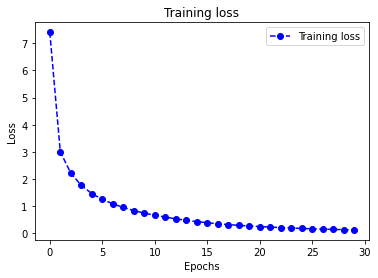

In [274]:
# Plot the training loss for each epoch to see how the model converged.
plt.plot(range(30), loss_values, 'bo--', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Evaluate the model

In [275]:
predictions = []
observations = []
with torch.no_grad():
    for i, (features, labels) in enumerate(test_loader):
        out = model(features)
        _, pred_idx = torch.max(out.data, 1)
        _, obs_idx = torch.max(labels.data, 1)
        digits = list(range(0,10))
        for idx, p in enumerate(pred_idx):
            predictions.append(digits[p])
            observations.append(digits[obs_idx[idx]])

# Calculate accuracy
acc = accuracy_score(observations, predictions)
print('Accuracy: ', acc)

Accuracy:  0.9638095238095238
